In [ ]:
!pip install -q tensorflow transformers scikit-learn pandas
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import classification_report

from google.colab import files
uploaded = files.upload()

clickbait_df = pd.read_csv(next(iter(uploaded)))  # assumes a single uploaded CSV file
clickbait_df.head()

df_source = clickbait_df[['source']].copy()
df_source['label'] = 0

df_clickbait = clickbait_df[['clickbait']].copy()
df_clickbait['label'] = 1


df_source.rename(columns={'source': 'text'}, inplace=True)
df_clickbait.rename(columns={'clickbait': 'text'}, inplace=True)


df_bert = pd.concat([df_source, df_clickbait]).sample(frac=1, random_state=42).reset_index(drop=True)
df_bert.head()


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_data(texts, max_len=64):
    return tokenizer(
        list(texts),
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )

tokenized_inputs = tokenize_data(df_bert['text'])


input_ids = tokenized_inputs['input_ids'].numpy()

X_train, X_test, y_train, y_test = train_test_split(
    input_ids,
    df_bert['label'].values,
    test_size=0.2,
    random_state=42,
    stratify=df_bert['label']
)

y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)


model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=3,
    batch_size=16
)


logits = model.predict(X_test).logits
y_pred = np.argmax(logits, axis=1)

print(classification_report(y_test, y_pred))


Saving clickbait_dataset.csv to clickbait_dataset (1).csv


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
87/87 [==============================] - 1196s 13s/step - loss: 0.2029 - accuracy: 0.9404 - val_loss: 0.1054 - val_accuracy: 0.9684
Epoch 2/3
87/87 [==============================] - 1159s 13s/step - loss: 0.0647 - accuracy: 0.9835 - val_loss: 0.0421 - val_accuracy: 0.9914
Epoch 3/3
11/11 [==============================] - 84s 7s/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       174
           1       0.99      1.00      1.00       174

    accuracy                           1.00       348
   macro avg       1.00      1.00      1.00       348
weighted avg       1.00      1.00      1.00       348



In [ ]:
model.save_pretrained("bert_clickbait_model")
tokenizer.save_pretrained("bert_clickbait_model")

('bert_clickbait_model/tokenizer_config.json',
 'bert_clickbait_model/special_tokens_map.json',
 'bert_clickbait_model/vocab.txt',
 'bert_clickbait_model/added_tokens.json')

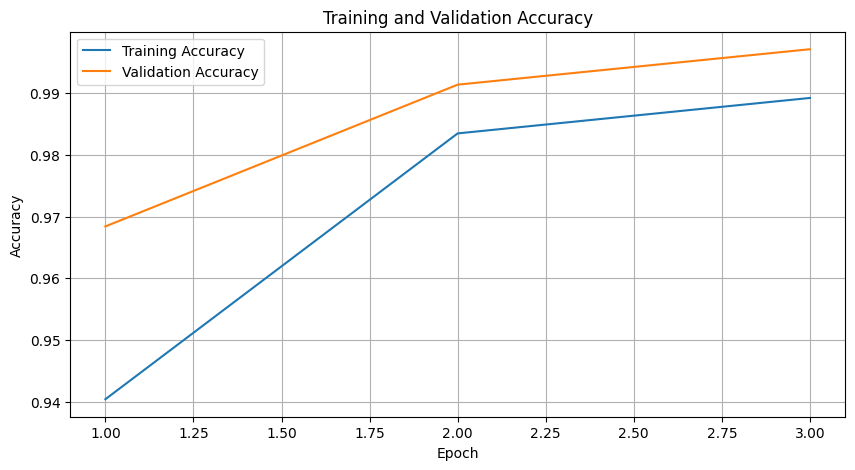

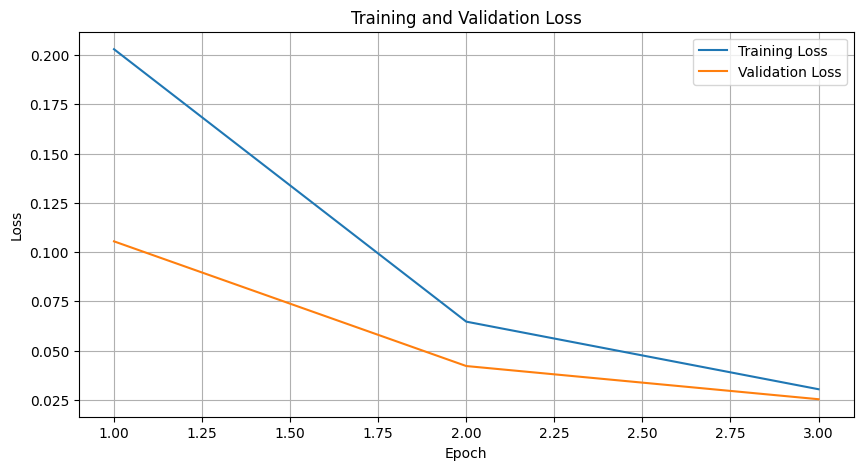

In [ ]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


,Model,Accuracy,Precision,Recall,F1
0,BERT (fine-tuned),0.9971,0.9943,1.0,0.9971


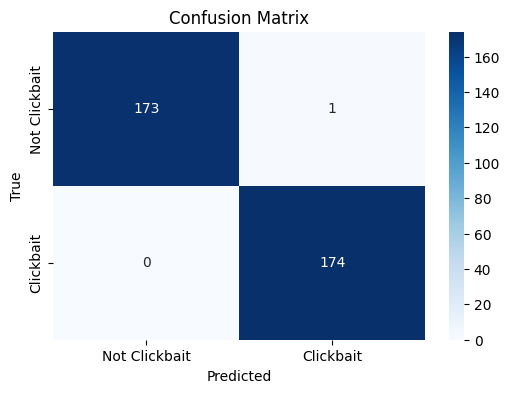

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Accuracy'}, axis=1)
              .sort_values('Accuracy', ascending=True))
  xs = counted['Accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Precision']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Precision'}, axis=1)
              .sort_values('Precision', ascending=True))
  xs = counted['Precision']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Precision', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Precision')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Recall']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Recall'}, axis=1)
              .sort_values('Recall', ascending=True))
  xs = counted['Recall']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Recall', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Recall')
_ = plt.ylabel('count()')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


metrics_table = pd.DataFrame([{
    'Model': 'BERT (fine-tuned)',
    'Accuracy': round(accuracy, 4),
    'Precision': round(precision, 4),
    'Recall': round(recall, 4),
    'F1': round(f1, 4)
}])
display(metrics_table)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Clickbait', 'Clickbait'], yticklabels=['Not Clickbait', 'Clickbait'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
num_source = clickbait_df['source'].notna().sum()
num_clickbait = clickbait_df['clickbait'].notna().sum()
total_examples = num_source + num_clickbait

print(f"Total examples: {total_examples}")
print(f" - Non-clickbait: {num_source}")
print(f" - Clickbait: {num_clickbait}")


Total examples: 1740
 - Non-clickbait: 870
 - Clickbait: 870
